In [1]:
import tasep as tp
import matplotlib.pyplot as plt
import numpy as np
import time
from joblib import Parallel, delayed
from scipy.spatial.distance import cdist
import pandas as pd
import sys

In [14]:
L = 2500
TIME = 1000
kon = 0.001
koff =0.5
kstep = 60
q = 5
kq=1

BSIM = 1

if BSIM:
    start = time.time()
    res = tp.bsim(L, TIME, kon, koff, kstep, q, kq, 1, 0, 0.1)
    end = time.time()
    print(end-start)
    sys.stdout.flush()
else:
    start = time.time()
    data, activation, nn, times, res, sides, dts = tp.ssim(L, TIME, kon, koff, kstep, q, kq)
    end = time.time()
    print(len(res))
    print(end-start)

2.24497652053833



In [15]:
data, times = res

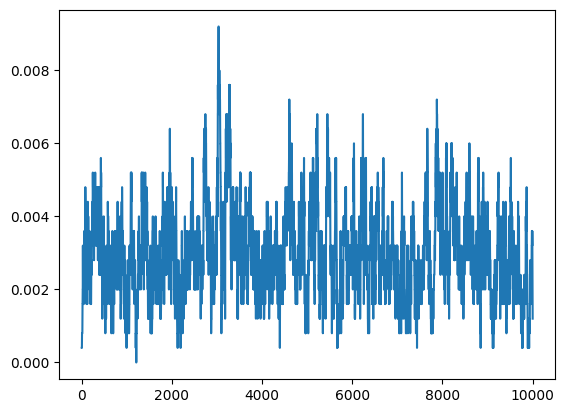

In [16]:
plt.plot(np.mean(data, axis=1))

In [3]:
L = 2500
TIME = 100
kon = 0.001
koff = 0.5
kstep = 60
q = 5
kq=0.1

BSIM = 1

if BSIM:
    start = time.time()
    data, times, actions, sides, dts = tp.bsim(L, TIME, kon, koff, kstep, q, kq)
    end = time.time()
    print(len(actions))
    print(end-start)
else:
    start = time.time()
    data, activation, nn, times, res, sides, dts = tp.ssim(L, TIME, kon, koff, kstep, q, kq)
    end = time.time()
    print(len(res))
    print(end-start)

128032
0.41687870025634766


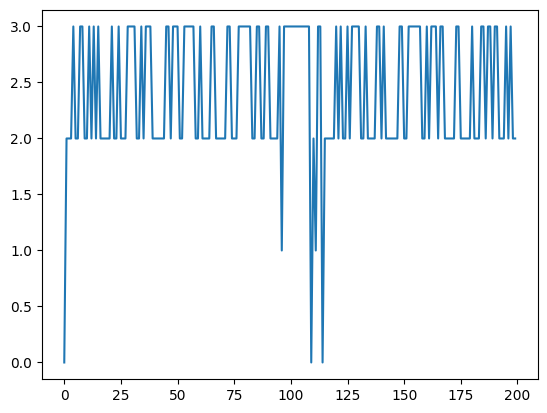

In [3]:
plt.plot(actions[:200])

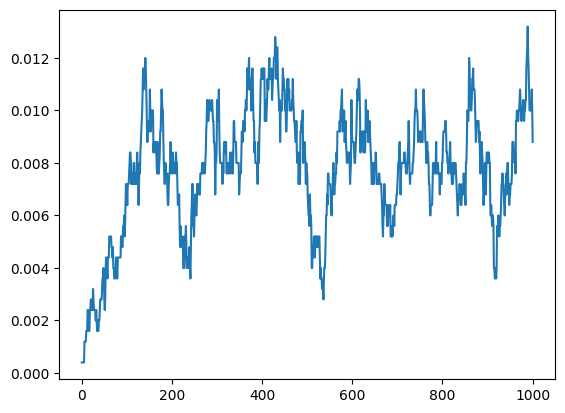

In [26]:
plt.plot(np.mean(data, axis=1))

In [30]:
1/6

0.16666666666666666

In [ ]:
data, activation, 

In [9]:
res[2]

array([1.8807051e+01, 6.4452528e-04, 2.2930980e-02, ..., 1.1786524e-03,
       1.5889191e-04, 1.9081007e-03], dtype=float32)

In [4]:
def submain(L, T, kon, koff, kstep, q, kq):
    SIZE = 5
    def run_ssim():
        start = time.time()
        res = tp.bsim(L, T, kon, koff, kstep, q, kq, True, False, 0.1)
        end = time.time()
        sys.stdout.flush()
        return  1000*(end-start)
    
    def run_bsim():
        start = time.time()
        res = tp.bsim(L, T, kon, koff, kstep, q, kq, False, True, 0.1)
        end = time.time()
        sys.stdout.flush()
        return  1000*(end-start)

    def run_all():
        start = time.time()
        res = tp.bsim(L, T, kon, koff, kstep, q, kq, False, True, 0.1)
        end = time.time()
        sys.stdout.flush()
        return 1000*(end-start)

    N1 = np.zeros(SIZE)
    N2 = np.zeros(SIZE)
    N3 = np.zeros(SIZE)
    
    
    for i in range(SIZE):
        dt = run_ssim()
        dt2 = run_bsim()
        dt3 = run_all()
        
        N1[i] = dt
        N2[i] = dt2
        N3[i] = dt3

    # print(R1)
    # print(R2)
    # print(N1)
    # print(N2)
    # res = res[4]

    return {"L":L, "T":T, "kon":kon, "koff":koff, "kstep":kstep, "q":q, "kq":kq,
            "traj":N1.mean(),"det":N2.mean(), "all":N3.mean()}

In [7]:
RES = Parallel(n_jobs=18)(
    delayed(submain)(1000, 400, kon, 1, kstep, q, kq)
    for kon in [0.01, 0.001, 0.0001]
    for kstep in [10, 50, 100]
    for q in [1, 5, 10]
    for kq in [10, 50, 100]
)

dfb = pd.DataFrame(RES)


In [8]:
# dfb["r_ssim"] = 1000*dfb["runtime_ssim"]/dfb["n_a_ssim"]
# dfb["r_bsim"] = 1000*dfb["runtime_bsim"]/dfb["n_a_bsim"]
# dfb["gain"] = ( dfb["r_bsim"] / dfb["r_ssim"] )
dfb


,L,T,kon,koff,kstep,q,kq,traj,det,all
0,1000,400,0.0100,1,10,1,10,37.741280,0.078154,0.022459
1,1000,400,0.0100,1,10,1,50,36.005306,0.067329,0.043440
2,1000,400,0.0100,1,10,1,100,38.599062,0.053406,0.020933
3,1000,400,0.0100,1,10,5,10,39.183235,0.075150,0.019217
4,1000,400,0.0100,1,10,5,50,37.172365,0.067949,0.021982
...,...,...,...,...,...,...,...,...,...,...
76,1000,400,0.0001,1,100,5,50,12.476587,0.021267,0.014257
77,1000,400,0.0001,1,100,5,100,12.935591,0.022554,0.014544
78,1000,400,0.0001,1,100,10,10,13.331223,0.026274,0.014448
79,1000,400,0.0001,1,100,10,50,14.152670,0.021696,0.015640


In [12]:
pd.set_option('display.max_rows', 100)

In [13]:
dfb

,L,T,kon,koff,kstep,q,kq,runtime_ssim,runtime_bsim,n_a_ssim,n_a_bsim,r_ssim,r_bsim,gain
0,200,400,0.0100,1,10,1,10,20.501566,7.121563,17078.8,17348.2,1.200410,0.410507,0.341973
1,200,400,0.0100,1,10,1,50,19.251108,7.081699,17127.8,17061.8,1.123969,0.415062,0.369282
2,200,400,0.0100,1,10,1,100,19.190359,6.922770,16960.2,16894.4,1.131494,0.409767,0.362147
3,200,400,0.0100,1,10,5,10,21.653557,7.411146,17946.6,17868.0,1.206555,0.414772,0.343766
4,200,400,0.0100,1,10,5,50,21.305609,7.095671,17349.2,17465.4,1.228046,0.406270,0.330827
5,200,400,0.0100,1,10,5,100,16.316080,6.210995,16767.6,17414.6,0.973072,0.356654,0.366524
6,200,400,0.0100,1,10,10,10,21.046114,7.685804,18683.4,18965.6,1.126461,0.405250,0.359755
7,200,400,0.0100,1,10,10,50,18.864489,6.892538,17204.6,16877.4,1.096479,0.408389,0.372454
8,200,400,0.0100,1,10,10,100,19.783545,7.006311,17093.8,16632.8,1.157352,0.421235,0.363964
9,200,400,0.0100,1,50,1,10,42.105436,17.660904,59502.2,61068.0,0.707628,0.289201,0.408690


In [30]:
dfb.to_csv("res.csv", index=False)

In [19]:
dfb["n_a_ssim"].mean()

22064.62469135802

In [5]:
dfb["gain"].mean()

0.2681486811061645

In [7]:
dfb

,L,T,kon,koff,kstep,q,kq,runtime,numActions,t_per_action
0,200,400,0.0100,1,10,1,10,27.166605,33154,0.819407
1,200,400,0.0100,1,10,1,50,133.717060,198651,0.673126
2,200,400,0.0100,1,10,1,100,184.096098,269375,0.683419
3,200,400,0.0100,1,10,5,10,17.883778,19147,0.934025
4,200,400,0.0100,1,10,5,50,33.464432,41285,0.810571
...,...,...,...,...,...,...,...,...,...,...
76,200,400,0.0001,1,100,5,50,2.292871,1541,1.487911
77,200,400,0.0001,1,100,5,100,0.411272,441,0.932590
78,200,400,0.0001,1,100,10,10,0.542879,481,1.128647
79,200,400,0.0001,1,100,10,50,0.524044,564,0.929156


In [8]:
DF = df.iloc[:, [0,1,2,3,4,5,6, -1]]
DFB = dfb.iloc[:, [0,1,2,3,4,5,6, -1]]

NameError: name 'df' is not defined

In [35]:
master = DF

In [33]:
master = pd.merge(master, DFB, how="inner", on=["L", "T", "kon", "koff", "kstep", "q", "kq"])

In [36]:
master

,L,T,kon,koff,kstep,q,kq,t_per_action
0,200,400,0.0100,1,10,1,10,0.733587
1,200,400,0.0100,1,10,1,50,0.677427
2,200,400,0.0100,1,10,1,100,0.643048
3,200,400,0.0100,1,10,5,10,0.803768
4,200,400,0.0100,1,10,5,50,0.674186
...,...,...,...,...,...,...,...,...
76,200,400,0.0001,1,100,5,50,0.905061
77,200,400,0.0001,1,100,5,100,1.156502
78,200,400,0.0001,1,100,10,10,0.917401
79,200,400,0.0001,1,100,10,50,0.887609


In [29]:
DF.join(DFB, on=["L", "T", "kon", "koff", "kstep", "q", "kq"])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [12]:
def secure_ssim(L, T, kon, koff, kstep, kq, q):
    """
    Returns a dictionary with the results of the simulation.
    
    Params:
    -----------------------
    L:int The length of the microtubeule.
    T:int Time
    kon:float binding rate
    koff:float unbinding rate
    kstep:float steping rate
    kq:float deactivation rate
    q:float strength factor. when a side is activated its binding affinity its q*kon.
    
    Returns:
    ----------------------
    dictionary with the results:
    -data:np.array of shape (10*T+1, L) A binary array. If one a kinesin is bound at that side at that time.
    -activation:np.array of shape (10*T+1, L) A binary array. If one that side is activated.
    -nn:np.array of shape (?, 2). Its row represents a binding event. The first number indicates the closest neighbor
    from left whereas the the second the closest neighbor from the right.
    -times:np.array of shape (10*T+1) An array of the exact timepoints. (Be aware its Gillespie, meaning time step is not fixed)
    -res:np.array An array with all the events. 0= binding, 1=unbinding, 2=stepping, 3=deactivation
    -dts:np.array An array with the dts of its event. 
    """
    data, activation, nn, times, res, dts = tasep.ssim(L, T, kon, koff, kstep, kq, q)
    sys.stdout.flush()
    return  {"data":data, "activation_sides":activation, "nn":nn, "times":times, "res":res, "dts":dts}

In [13]:
def main(L, T, kon, koff, kstep, kq, q):
    data = secure_ssim(L, T, kon, koff, kstep, kq, q)
    config = {"L":L, "T":T, "kon":kon, "koff":koff, "kstep":kstep,"kq":kq, "q":q}
    return {"config":config, "data":data}

# Pickle the results

In [5]:
import pickle

In [19]:

with open("conf_d", "wb") as f:
    pickle.dump(
        main(1000, 100, 0.01, 1, 100, 100, 4),
        f
    )